# Exploratory Analysis - Most loyal customers

Exploratory data analysis. In this raport we will try to identify key traits of our customer's most loyal accounts and provide actionable insights to optimize future sales efforts. 

## Preparation

Let's start with preparing needed libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pprint
import json
from wordcloud import WordCloud, STOPWORDS

In [2]:
plt.style.use('ggplot')

The data is given. It's a CSV file called 'target_accounts' and JSON file called 'people_data'. Those contain:
1) people_data.json: a database dump of over 10,000 employee profiles. Each profile includes various attributes related to the individual employee.
2) target_accounts.csv: contains a list of our customer's most loyal accounts.
 
Let's upload them as raw dataset before any clearing.

In [3]:
df_main_1_raw = pd.read_csv ('accounts.csv')
df_main_2_raw = pd.read_json ('people.json')

## Data Integration
Load and explore both datasets to understand their structure and content.

Quick look at the datasets.

In [4]:
display(df_main_1_raw.sample(10))
df_main_1_raw.info()

,Unnamed: 0,full_name,job_title,company_name
621,621,Tiffany Carter,"Senior Vice President, Delivery and GTM","Hill, Dodson and Anderson"
448,448,Emily Maldonado,Vice President of Strategic Partnerships,"Knight, White and White"
614,614,Cynthia Bowen,Executive Director,Thornton-Doyle
356,356,Grace Brown,Head Talent Acquisition,Thomas LLC
197,197,Craig Hamilton,"Investor and Director, Corporate Services",Rodgers Ltd
415,415,Manuel Anderson,Non Executive Director Board Member,Oconnell and Sons
243,243,Mark Crawford,Co-Founder,"Frazier, Mueller and Russo"
322,322,Nicholas Bender,"Investor and Director, Corporate Services",Martinez-Mays
618,618,David Wilson,Director of Community,"Pham, Chen and Garcia"
262,262,Brenda Webb,"Senior Vice President, Delivery and GTM",Cortez-Melton


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    628 non-null    int64 
 1   full_name     628 non-null    object
 2   job_title     628 non-null    object
 3   company_name  628 non-null    object
dtypes: int64(1), object(3)
memory usage: 19.8+ KB


#### Comments
As we know from the provided information, it is a list of our customer's most loyal accounts. We can see it's telling us their name, their job title and company where they work. Also, we can see that apart from that, all columns contain text values.

#### Info
When loading CSV file unnamed column was added. We will get rid of that, as we have already index column. 
Suprisingly we don't have any null values, but what about duplicates? We will check that also in next step.

In [5]:
#Dropping the 'Unnamed: 0 Column
df_main_1 = df_main_1_raw.drop(columns=['Unnamed: 0'])
display(df_main_1)

#Checking for duplicates
duplicates_1 = df_main_1.duplicated().sum()
print("The amount of duplicated rows:", duplicates_1)

,full_name,job_title,company_name
0,Gary Barber,Basketball Coach,Reynolds-Matthews
1,Leslie Vega,Chief Executive Officer and Founder,Nelson-Mccall
2,Kimberly Jenkins,"Senior Assistant Director, Community Engagement",Solomon Inc
3,Michael Wilson,Founder and Executive Director,Hayes Group
4,David Craig,Chief Marketing Officer,"Wilson, Jarvis and Mueller"
...,...,...,...
623,Rebecca Blackburn,"Co-Founder, Business Development",Cooper-Wells
624,Shawn Conner,Director of Events,"Blevins, Garcia and White"
625,Joseph Sullivan,Chief Executive Officer and Co-Founder,"Woodard, Hicks and Barber"
626,Stephen Jones,Chief Executive Officer,"Taylor, Robbins and Stewart"


The amount of duplicated rows: 0


No duplicated rows or null values. Great score, we can move to the second dataset.

In [6]:
display(df_main_2_raw.sample(10))
df_main_2_raw.info()

,full_name,linkedin_username,mobile_phone,personal_email,work_email,location_country,location_locality,linkedin_url,location_name,job_title,industry,company_name,experience,level
469,Carlos Madden,some-plant,697.839.9042x81668,dominique29@hotmail.com,gutierrezmark@mcmahon.org,Kenya,East Wesleystad,linkedin.com/in/some-plant,"East Wesleystad, Kenya",Manufacturing engineer,,Todd-Mckay,[],
2366,Mariah Flores,experience,(426)525-8530,websterconnie@yahoo.com,waynedavis@anderson.com,Svalbard & Jan Mayen Islands,Craigshire,linkedin.com/in/experience,"Craigshire, Svalbard & Jan Mayen Islands",Editor and and Healthcare Industry,investment banking,Stewart-Edwards,"[{'company': {'name': 'Stewart-Edwards', 'webs...",manager
3538,Rebecca Strickland,from-trouble-paper,+1-444-444-8283x8038,kelly64@hotmail.com,mthompson@gonzalez.com,British Indian Ocean Territory (Chagos Archipe...,North Adrian,linkedin.com/in/from-trouble-paper,"North Adrian, British Indian Ocean Territory (...",Venture Partner,utilities,Hall Ltd,"[{'company': {'name': 'Hall Ltd', 'website': '...",manager
8625,Christopher Dunn,mind-go-successful,874-894-3145x8800,lburgess@hotmail.com,mcdowelldavid@carroll.biz,Tanzania,Lake Sandra,linkedin.com/in/mind-go-successful,"Lake Sandra, Tanzania",Executive Personal Assistant,venture capital & private equity,Gonzales Ltd,"[{'company': {'name': 'Gonzales Ltd', 'website...",entry
3823,Kaitlin Burton,collection-try,(320)495-4388x20449,greenshawn@yahoo.com,jill58@wheeler.biz,Cameroon,Port Jason,en.linkedin.com/in/collection-try,"Port Jason, Cameroon",Chief Executive Officer,computer software,"Jones, Bartlett and Hopkins","[{'company': {'name': 'Jones, Bartlett and Hop...",manager
11550,Kelly Robinson,president-form,(946)273-4188x44963,marquezpamela@hotmail.com,angela58@harris.org,Belize,Mariamouth,linkedin.com/in/president-form,"Mariamouth, Belize",Senior Recruiter,consumer goods,"Campbell, Bailey and Wilson","[{'company': {'name': 'Campbell, Bailey and Wi...",manager
1870,Nancy Morrison,population,(295)772-0328x709,lesliewang@gmail.com,richard28@bates.com,Israel,Griffinport,linkedin.com/in/population,"Griffinport, Israel","Senior Manager, Corporate Development",venture capital & private equity,Miranda Group,"[{'company': {'name': 'Miranda Group', 'websit...",entry
7143,Julie Cox DDS,by-floor-carry-fire,001-883-654-7233x41168,butlercynthia@gmail.com,mark49@baker.net,Guyana,North Chelsea,en.linkedin.com/in/by-floor-carry-fire,"North Chelsea, Guyana","Co-Founder, Business Development","glass, ceramics & concrete",Washington-Jackson,"[{'company': {'name': 'Washington-Jackson', 'w...",cxo
11352,Chris Davis,simply-change,(613)307-1229x719,csimmons@gmail.com,keithdavis@navarro-terry.org,Western Sahara,Matthewsberg,linkedin.com/in/simply-change,"Matthewsberg, Western Sahara",Patient Care Coordinator,accounting,"Rodriguez, Martin and Brock","[{'company': {'name': 'Rodriguez, Martin and B...",senior
10744,Brooke Brown,perhaps-which-mrs,001-841-532-7788x249,fcunningham@gmail.com,heidirojas@moore.net,Central African Republic,Vargasville,en.linkedin.com/in/perhaps-which-mrs,"Vargasville, Central African Republic",Senior Healthcare Analyst,tobacco,Thomas-Mahoney,"[{'company': {'name': 'Thomas-Mahoney', 'websi...",cxo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          11835 non-null  object
 1   linkedin_username  11835 non-null  object
 2   mobile_phone       11835 non-null  object
 3   personal_email     11835 non-null  object
 4   work_email         11835 non-null  object
 5   location_country   11835 non-null  object
 6   location_locality  11835 non-null  object
 7   linkedin_url       11835 non-null  object
 8   location_name      11835 non-null  object
 9   job_title          11835 non-null  object
 10  industry           11835 non-null  object
 11  company_name       11835 non-null  object
 12  experience         11835 non-null  object
 13  level              11835 non-null  object
dtypes: object(14)
memory usage: 1.3+ MB


#### Comments
As we know from the provided information, it is a list of over 10 000 employees. We can see it's telling us the same information as the previous dataset, but also additional attributes such as linkedin_username, work_email country, industry or experience they have. Also, we can see that apart from that, all columns contain rather categorical values or unique identifiers, even though they have digits in column 'mobile_phone' however those numbers won't be used for any numerical operations but rather as a identifiers.

#### Info
As we are dealing with JSON file, we can assume that some parts can contain nested data. Definitely column 'experience' is one of the examples. There is a nested professional experience that will be helpful for further analysis. However we will deal with that after selecting the customer we are interested in.
Suprisingly we don't have any null values, but again quick check for duplicated. However, there is a nested data, so for duplicates check we will convert them temporarily to string.

In [7]:
#Converting to string
df_main_2_for_duplicates = df_main_2_raw.astype(str)

#Checking for duplicates
duplicates_2 = df_main_2_for_duplicates.duplicated().sum()
print("The amount of duplicated rows:", duplicates_2)

The amount of duplicated rows: 0


We can also see that some of the columns held the same information. For example 'location_name' is probably telling us the same information that columns 'location_locality' and 'location_country' combined. Let's verify that.

In [8]:
# Combine columns 'location_country' and 'location_locality'
df_main_2_raw['location_combined'] = df_main_2_raw['location_locality'] + ', ' + df_main_2_raw['location_country']

all_match = (df_main_2_raw['location_combined'] == df_main_2_raw['location_name']).all()

result = 'Yes' if all_match else 'No'
print(result)

Yes


We can drop the column 'location_name', so we won't have duplicated information.

In [9]:
#Dropping the 'location_name' column
df_main_2_cleaned_1 = df_main_2_raw.drop(columns=['location_name','location_combined'])
display(df_main_2_cleaned_1)

,full_name,linkedin_username,mobile_phone,personal_email,work_email,location_country,location_locality,linkedin_url,job_title,industry,company_name,experience,level
0,Meghan Young,i-forget-stay,317-515-0278x3633,ofritz@gmail.com,qjones@patterson.com,Burundi,South Sara,linkedin.com/in/i-forget-stay,Founder and Chief Executive Officer,venture capital & private equity,Mann-Lucas,"[{'company': {'name': 'Mann-Lucas', 'website':...",manager
1,James Adams Jr.,begin-box-above,(595)785-8374x6441,holderrebecca@yahoo.com,lawrencenicholas@bradley.com,British Virgin Islands,Port Lance,linkedin.com/in/begin-box-above,Online Intern,transportation/trucking/railroad,Leonard Inc,"[{'company': {'name': 'Leonard Inc', 'website'...",cxo
2,Gabriel Palmer,movement-free,001-855-892-7067,htaylor@hotmail.com,bsmith@castaneda.com,Dominica,Port Scottside,linkedin.com/in/movement-free,"Co-Founder, Business Development",investment banking,"King, Mann and Pacheco","[{'company': {'name': 'King, Mann and Pacheco'...",entry
3,George Peterson,couple-whom-anyone,960-341-8376x4564,smithdonald@gmail.com,eanderson@murphy-fuentes.biz,Barbados,North Laura,linkedin.com/in/couple-whom-anyone,Regional Fleet Maintenance Manager,furniture,"Hines, Nguyen and Frazier","[{'company': {'name': 'Hines, Nguyen and Frazi...",partner
4,Joseph Davis,song-few-financial,676.969.2503,myersrebecca@yahoo.com,huffdarlene@choi.com,Belgium,Curtisborough,linkedin.com/in/song-few-financial,"Senior Manager, Developer Community Experience",translation and localization,"Flores, Murphy and Obrien","[{'company': {'name': 'Flores, Murphy and Obri...",owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11830,Megan Lyons,right-treatment,+1-873-320-5559x6026,laurierush@yahoo.com,gregcarter@mcfarland.net,Netherlands Antilles,South Aprilfurt,linkedin.com/in/right-treatment,"Production designer, theatre/television/film",,Lewis-Matthews,[],
11831,Nicole Acosta,design-yourself,6324059965,gfitzgerald@yahoo.com,uzimmerman@bradley.com,Belarus,Port Karenhaven,linkedin.com/in/design-yourself,Senior Administrative Assistant,computer software,"Johnston, Lee and Reynolds","[{'company': {'name': 'Johnston, Lee and Reyno...",partner
11832,Ethan James,degree-model-strong,+1-684-851-9107x858,lauraarmstrong@yahoo.com,jamesvillegas@myers.info,Philippines,Port Raymondshire,linkedin.com/in/degree-model-strong,Corporate Sales Representative,legal services,Baker Group,"[{'company': {'name': 'Baker Group', 'website'...",senior
11833,Steven Thompson,ago-a-act-minute,578.608.8289x1643,gonzalezanna@hotmail.com,hintonsean@scott-shields.net,French Southern Territories,Boydland,en.linkedin.com/in/ago-a-act-minute,Founder and Executive Director,accounting,"Phillips, Miller and Ross","[{'company': {'name': 'Phillips, Miller and Ro...",partner


Another example is 'linkedin_username' and 'linkedin_url'. They are also probably telling us duplicated information. It seems that 'linkedin_username' is a part of 'linkedin_url' column. Let's verify that.

In [10]:
all_match_2 = (df_main_2_cleaned_1.apply(lambda row: row['linkedin_username'] in row['linkedin_url'], axis=1)).all()
result_2 = 'Yes' if all_match else 'No'
print(result_2)

Yes


Again, we can drop the column 'linkedin_url', so we won't have duplicated information.

In [11]:
#Dropping the 'location_name' column
df_main_2_cleaned_2 = df_main_2_cleaned_1.drop(columns=['linkedin_url'])
display(df_main_2_cleaned_2)

,full_name,linkedin_username,mobile_phone,personal_email,work_email,location_country,location_locality,job_title,industry,company_name,experience,level
0,Meghan Young,i-forget-stay,317-515-0278x3633,ofritz@gmail.com,qjones@patterson.com,Burundi,South Sara,Founder and Chief Executive Officer,venture capital & private equity,Mann-Lucas,"[{'company': {'name': 'Mann-Lucas', 'website':...",manager
1,James Adams Jr.,begin-box-above,(595)785-8374x6441,holderrebecca@yahoo.com,lawrencenicholas@bradley.com,British Virgin Islands,Port Lance,Online Intern,transportation/trucking/railroad,Leonard Inc,"[{'company': {'name': 'Leonard Inc', 'website'...",cxo
2,Gabriel Palmer,movement-free,001-855-892-7067,htaylor@hotmail.com,bsmith@castaneda.com,Dominica,Port Scottside,"Co-Founder, Business Development",investment banking,"King, Mann and Pacheco","[{'company': {'name': 'King, Mann and Pacheco'...",entry
3,George Peterson,couple-whom-anyone,960-341-8376x4564,smithdonald@gmail.com,eanderson@murphy-fuentes.biz,Barbados,North Laura,Regional Fleet Maintenance Manager,furniture,"Hines, Nguyen and Frazier","[{'company': {'name': 'Hines, Nguyen and Frazi...",partner
4,Joseph Davis,song-few-financial,676.969.2503,myersrebecca@yahoo.com,huffdarlene@choi.com,Belgium,Curtisborough,"Senior Manager, Developer Community Experience",translation and localization,"Flores, Murphy and Obrien","[{'company': {'name': 'Flores, Murphy and Obri...",owner
...,...,...,...,...,...,...,...,...,...,...,...,...
11830,Megan Lyons,right-treatment,+1-873-320-5559x6026,laurierush@yahoo.com,gregcarter@mcfarland.net,Netherlands Antilles,South Aprilfurt,"Production designer, theatre/television/film",,Lewis-Matthews,[],
11831,Nicole Acosta,design-yourself,6324059965,gfitzgerald@yahoo.com,uzimmerman@bradley.com,Belarus,Port Karenhaven,Senior Administrative Assistant,computer software,"Johnston, Lee and Reynolds","[{'company': {'name': 'Johnston, Lee and Reyno...",partner
11832,Ethan James,degree-model-strong,+1-684-851-9107x858,lauraarmstrong@yahoo.com,jamesvillegas@myers.info,Philippines,Port Raymondshire,Corporate Sales Representative,legal services,Baker Group,"[{'company': {'name': 'Baker Group', 'website'...",senior
11833,Steven Thompson,ago-a-act-minute,578.608.8289x1643,gonzalezanna@hotmail.com,hintonsean@scott-shields.net,French Southern Territories,Boydland,Founder and Executive Director,accounting,"Phillips, Miller and Ross","[{'company': {'name': 'Phillips, Miller and Ro...",partner


Another problematic column can be job_title as we know the same titles can be described differently. Let's see if that's the case here.

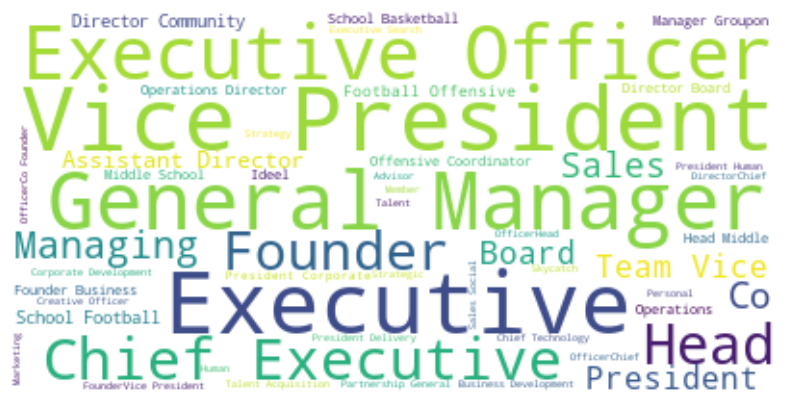

In [12]:
text=''.join(df_main_1['job_title'].dropna())
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

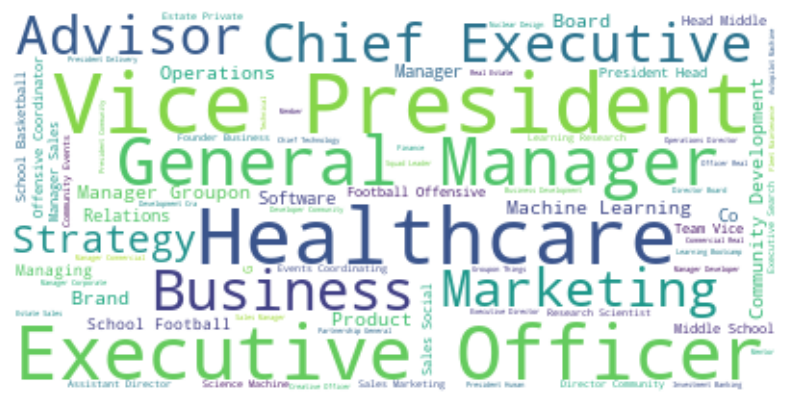

In [13]:
text=''.join(df_main_2_cleaned_2['job_title'].dropna())
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Nothing alarming, but let's be sure.

In [14]:
job_titles = ['CEO','COO','CFO','CTO','CMO','CHRO']

pattern_job_titles = '|'.join(job_titles)

df_job_title_short = df_main_1[df_main_1['job_title'].str.contains(pattern_job_titles, regex=True)]
display(df_job_title_short)

df_job_title_short_2 = df_main_2_cleaned_2[df_main_2_cleaned_2['job_title'].str.contains(pattern_job_titles, regex=True)]
display(df_job_title_short_2)

,full_name,job_title,company_name
92,Carrie Martin,Cofounder and CEO,Smith-Taylor
93,Anita Solis,Founder and CEOr,Atkins-Walsh
182,Nancy Cameron,Cofounder and CEO,Anderson Inc
194,Kenneth Maldonado,CEO and Founder,Payne Group
245,Gregory Graves,CEO,Bush and Sons
271,Kayla Garcia,CEO,Pennington PLC
318,Jose Rollins,Cofounder and CEO,Fischer-May
349,Caroline Baxter,"Founder, CEO",Anderson and Sons
353,Robert Perry,CEO and Co-Founder,Sanders Ltd
490,Curtis Rodriguez,"Founder, CEO",Soto


,full_name,linkedin_username,mobile_phone,personal_email,work_email,location_country,location_locality,job_title,industry,company_name,experience,level


We can see that those short version only exist in first dataframe and it's only regaridng CEO - Chief Executive Officer. Let's deal with them.

In [15]:
df_main_1['job_title'] = df_main_1['job_title'].replace(r'\bCEO\b', 'Chief Executive Officer', regex=True)
display(df_main_1['job_title'])

0                                     Basketball Coach
1                  Chief Executive Officer and Founder
2      Senior Assistant Director, Community Engagement
3                       Founder and Executive Director
4                              Chief Marketing Officer
                            ...                       
623                   Co-Founder, Business Development
624                                 Director of Events
625             Chief Executive Officer and Co-Founder
626                            Chief Executive Officer
627                   Co-Founder, Business Development
Name: job_title, Length: 628, dtype: object

In [16]:
df_job_title_short = df_main_1[df_main_1['job_title'].str.contains(pattern_job_titles, regex=True)]
display(df_job_title_short)

,full_name,job_title,company_name
93,Anita Solis,Founder and CEOr,Atkins-Walsh


There still some typos left.

In [17]:
df_main_1['job_title'] = df_main_1['job_title'].replace(r'\bCEOr\b', 'Chief Executive Officer', regex=True)
display(df_main_1['job_title'])
df_job_title_short = df_main_1[df_main_1['job_title'].str.contains(pattern_job_titles, regex=True)]
display(df_job_title_short)

0                                     Basketball Coach
1                  Chief Executive Officer and Founder
2      Senior Assistant Director, Community Engagement
3                       Founder and Executive Director
4                              Chief Marketing Officer
                            ...                       
623                   Co-Founder, Business Development
624                                 Director of Events
625             Chief Executive Officer and Co-Founder
626                            Chief Executive Officer
627                   Co-Founder, Business Development
Name: job_title, Length: 628, dtype: object

,full_name,job_title,company_name


Let's do the same for company name column. Here we can also have a potentially problematic situation, as company names can be described differently.

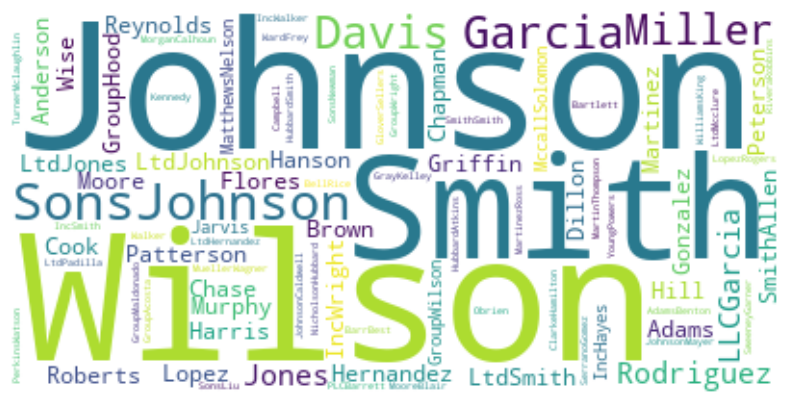

In [18]:
text=''.join(df_main_1['company_name'].dropna())
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

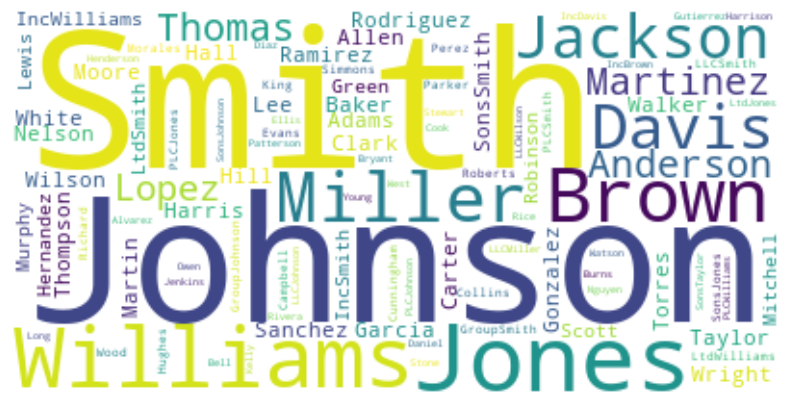

In [19]:
text=''.join(df_main_2_cleaned_2['company_name'].dropna())
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We can spot some words typical for companies name such as 'ltd' or 'inc'. Let's verify.

In [20]:
corporate_end = ['inc','co','corp','ltd', 'llc', 'plc']

pattern_corp_end = '|'.join(corporate_end)

df_corporate_end = df_main_1[df_main_1['company_name'].str.contains(r'\b(?:' + pattern_corp_end + r')\b', case=False, regex=True)]
display(df_corporate_end)

df_corporate_end_2 = df_main_2_cleaned_2[df_main_2_cleaned_2['company_name'].str.contains(r'\b(?:' + pattern_corp_end + r')\b', case=False, regex=True)]
display(df_corporate_end_2)

,full_name,job_title,company_name
2,Kimberly Jenkins,"Senior Assistant Director, Community Engagement",Solomon Inc
6,Matthew James,"Founder, Chief Executive Officer",Mclaughlin Inc
14,Tiffany Smith DDS,Independent Executive Consultant,Blair Ltd
20,Heidi Benitez,Executive Member and Judge,Robbins Ltd
26,Tanya Luna,Executive Personal Assistant,Hamilton Ltd
...,...,...,...
598,Lindsey Rowe,Founder and Executive Director,Farrell Ltd
603,Marissa Graham,"Founding Team, Vice President Operations",Lara PLC
606,Pamela Johnson,Head Talent Acquisition,Green LLC
615,Ashley Case,Chief Marketing Officer,Wright Inc


,full_name,linkedin_username,mobile_phone,personal_email,work_email,location_country,location_locality,job_title,industry,company_name,experience,level
1,James Adams Jr.,begin-box-above,(595)785-8374x6441,holderrebecca@yahoo.com,lawrencenicholas@bradley.com,British Virgin Islands,Port Lance,Online Intern,transportation/trucking/railroad,Leonard Inc,"[{'company': {'name': 'Leonard Inc', 'website'...",cxo
9,Kimberly Gomez,instead-goal-might,+1-822-909-0870x26089,diane71@yahoo.com,tracyhood@moore.com,Morocco,Wardside,"Head, Talent Acquisition and Development",computer software,Barron PLC,"[{'company': {'name': 'Barron PLC', 'website':...",manager
13,Joyce Johnson,go-along-drop-where,+1-897-280-4052x68693,pamela82@gmail.com,reedbrittany@castillo.net,United Kingdom,North Justinland,Investor and Chairman,computer software,Holt PLC,"[{'company': {'name': 'Holt PLC', 'website': '...",manager
14,Patrick Jones,education-new,001-878-960-1820x699,ljordan@hotmail.com,kristina97@thompson.com,Kyrgyz Republic,Cynthiaborough,Director of Events,venture capital & private equity,Wood Ltd,"[{'company': {'name': 'Wood Ltd', 'website': '...",director
16,Jerry Warner,central-significant,(394)937-3080x028,perezjeffrey@yahoo.com,elizabeth03@mcbride.com,Western Sahara,Matthewhaven,Data Science + Machine Learning @ Nvidia,computer software,Love Inc,"[{'company': {'name': 'Love Inc', 'website': '...",cxo
...,...,...,...,...,...,...,...,...,...,...,...,...
11800,Andrea Fox,performance-thank,422-809-1489x866,matthewsconnie@hotmail.com,pamelaking@matthews-perez.com,Australia,Gallegosland,Executive Board,venture capital & private equity,Martin Ltd,"[{'company': {'name': 'Martin Ltd', 'website':...",cxo
11801,Kathleen Wiggins,again-information,001-662-980-5541x19657,sarahshelton@yahoo.com,austinmueller@henderson-christian.org,Philippines,Michelleshire,Senior Software Engineering,law enforcement,Zimmerman LLC,"[{'company': {'name': 'Zimmerman LLC', 'websit...",manager
11807,Scott Gonzalez,get-sure-go-surface,001-848-400-9506x4675,owensmallory@gmail.com,donald97@carpenter.info,Palestinian Territory,Ellisland,Vice President of Strategic Partnerships,veterinary,Garcia PLC,"[{'company': {'name': 'Garcia PLC', 'website':...",partner
11822,Jeremy Mayer,executive-could,879.520.0683,blackwellkathryn@hotmail.com,darlenepotts@hernandez.com,Montserrat,East Daniel,Co-Founder and Advisor and Director,"glass, ceramics & concrete",Brown LLC,"[{'company': {'name': 'Brown LLC', 'website': ...",senior


In [21]:
df_main_1['company_name'] = df_main_1['company_name'].str.replace(r'(?i)\b(?:' + pattern_corp_end  + r')\b', '', regex=True).str.strip()
df_corporate_end_check = df_main_1[df_main_1['company_name'].str.contains(r'\b(?:' + pattern_corp_end + r')\b', case=False, regex=True)]
display(df_corporate_end_check)

,full_name,job_title,company_name


In [22]:
df_main_2_cleaned_2['company_name'] = df_main_2_cleaned_2['company_name'].str.replace(r'(?i)\b(?:' + pattern_corp_end  + r')\b', '', regex=True).str.strip()
df_corporate_end_check_2 = df_main_2_cleaned_2[df_main_2_cleaned_2['company_name'].str.contains(r'\b(?:' + pattern_corp_end + r')\b', case=False, regex=True)]
display(df_corporate_end_check_2)

,full_name,linkedin_username,mobile_phone,personal_email,work_email,location_country,location_locality,job_title,industry,company_name,experience,level


Another issue could be writing many names as common name. For example Smith & Sons = Smith and Sons.

In [23]:
df_fusion = df_main_1[df_main_1['company_name'].str.contains('&', case=False, regex=True)]
display(df_fusion)

df_fusion_2 = df_main_2_cleaned_2[df_main_2_cleaned_2['company_name'].str.contains('&', case=False, regex=True)]
display(df_fusion_2)

,full_name,job_title,company_name
7,Jesus Friedman,Vice President Hardware,"Smith, Obrien & Johnson"


,full_name,linkedin_username,mobile_phone,personal_email,work_email,location_country,location_locality,job_title,industry,company_name,experience,level


In [24]:
df_main_1['company_name'] = df_main_1['company_name'].replace('&', 'and', regex=True)

In [25]:
df_fusion = df_main_1[df_main_1['company_name'].str.contains('&', case=False, regex=True)]
display(df_fusion)

,full_name,job_title,company_name


For further work we will rename 2 dataframe and rearrange the columns a bit:

In [26]:
df_main_2 = df_main_2_cleaned_2[['full_name',
                                           'job_title',
                                           'level',
                                           'company_name',
                                           'industry',
                                           'location_country',
                                           'location_locality',
                                           'linkedin_username',
                                           'mobile_phone',
                                           'personal_email',
                                           'work_email',
                                           'experience']]
display(df_main_2)

,full_name,job_title,level,company_name,industry,location_country,location_locality,linkedin_username,mobile_phone,personal_email,work_email,experience
0,Meghan Young,Founder and Chief Executive Officer,manager,Mann-Lucas,venture capital & private equity,Burundi,South Sara,i-forget-stay,317-515-0278x3633,ofritz@gmail.com,qjones@patterson.com,"[{'company': {'name': 'Mann-Lucas', 'website':..."
1,James Adams Jr.,Online Intern,cxo,Leonard,transportation/trucking/railroad,British Virgin Islands,Port Lance,begin-box-above,(595)785-8374x6441,holderrebecca@yahoo.com,lawrencenicholas@bradley.com,"[{'company': {'name': 'Leonard Inc', 'website'..."
2,Gabriel Palmer,"Co-Founder, Business Development",entry,"King, Mann and Pacheco",investment banking,Dominica,Port Scottside,movement-free,001-855-892-7067,htaylor@hotmail.com,bsmith@castaneda.com,"[{'company': {'name': 'King, Mann and Pacheco'..."
3,George Peterson,Regional Fleet Maintenance Manager,partner,"Hines, Nguyen and Frazier",furniture,Barbados,North Laura,couple-whom-anyone,960-341-8376x4564,smithdonald@gmail.com,eanderson@murphy-fuentes.biz,"[{'company': {'name': 'Hines, Nguyen and Frazi..."
4,Joseph Davis,"Senior Manager, Developer Community Experience",owner,"Flores, Murphy and Obrien",translation and localization,Belgium,Curtisborough,song-few-financial,676.969.2503,myersrebecca@yahoo.com,huffdarlene@choi.com,"[{'company': {'name': 'Flores, Murphy and Obri..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11830,Megan Lyons,"Production designer, theatre/television/film",,Lewis-Matthews,,Netherlands Antilles,South Aprilfurt,right-treatment,+1-873-320-5559x6026,laurierush@yahoo.com,gregcarter@mcfarland.net,[]
11831,Nicole Acosta,Senior Administrative Assistant,partner,"Johnston, Lee and Reynolds",computer software,Belarus,Port Karenhaven,design-yourself,6324059965,gfitzgerald@yahoo.com,uzimmerman@bradley.com,"[{'company': {'name': 'Johnston, Lee and Reyno..."
11832,Ethan James,Corporate Sales Representative,senior,Baker Group,legal services,Philippines,Port Raymondshire,degree-model-strong,+1-684-851-9107x858,lauraarmstrong@yahoo.com,jamesvillegas@myers.info,"[{'company': {'name': 'Baker Group', 'website'..."
11833,Steven Thompson,Founder and Executive Director,partner,"Phillips, Miller and Ross",accounting,French Southern Territories,Boydland,ago-a-act-minute,578.608.8289x1643,gonzalezanna@hotmail.com,hintonsean@scott-shields.net,"[{'company': {'name': 'Phillips, Miller and Ro..."


## Matching profiles
Identify and extract the profiles from the people_data.json file that correspond to the accounts listed in the target_accounts.csv file.

We have two datasets ready for analysis:

1) df_main_1 = target_accounts
2) df_main_2 = people_data

Following instructions, we will now extract matching profiles from 'people_data' and add them to corresponding rows in 'target_accounts'. We will see how they are connected. Let's see that by selectin random company name.

In [27]:
display(df_main_1[df_main_1['company_name'] == 'Hayes Group'])
display(df_main_2[df_main_2['company_name'] == 'Hayes Group'])

,full_name,job_title,company_name
3,Michael Wilson,Founder and Executive Director,Hayes Group


,full_name,job_title,level,company_name,industry,location_country,location_locality,linkedin_username,mobile_phone,personal_email,work_email,experience
10662,Michael Wilson,Founder and Executive Director,partner,Hayes Group,venture capital & private equity,Saudi Arabia,West Tim,technology,(532)804-3992,yorkangela@yahoo.com,cmyers@richards-chapman.org,"[{'company': {'name': 'Hayes Group', 'website'..."


It looks like they both held the same information but let's see if that's the case for all rows. If that's correct, merged dataframe will have exactly the same amount of rows if dataset 'target_accounts' which is 628.

In [28]:
merged_to_check = pd.merge(df_main_1, df_main_2, how='inner', on=['full_name', 'job_title', 'company_name'])
merged_to_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          628 non-null    object
 1   job_title          628 non-null    object
 2   company_name       628 non-null    object
 3   level              628 non-null    object
 4   industry           628 non-null    object
 5   location_country   628 non-null    object
 6   location_locality  628 non-null    object
 7   linkedin_username  628 non-null    object
 8   mobile_phone       628 non-null    object
 9   personal_email     628 non-null    object
 10  work_email         628 non-null    object
 11  experience         628 non-null    object
dtypes: object(12)
memory usage: 59.0+ KB


Correct. We have exact corresponding rows.

In [29]:
df_main = pd.merge(df_main_1, df_main_2, how='inner', on=['full_name', 'job_title', 'company_name'])
display(df_main)

,full_name,job_title,company_name,level,industry,location_country,location_locality,linkedin_username,mobile_phone,personal_email,work_email,experience
0,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"[{'company': {'name': 'Reynolds-Matthews', 'we..."
1,Leslie Vega,Chief Executive Officer and Founder,Nelson-Mccall,director,computer software,Korea,Thomaschester,car-better-finally,+1-217-927-8498x4419,alfred13@gmail.com,wilsonbrandon@hogan.com,"[{'company': {'name': 'Nelson-Mccall', 'websit..."
2,Kimberly Jenkins,"Senior Assistant Director, Community Engagement",Solomon,partner,venture capital & private equity,United Arab Emirates,West Anthony,perform-begin-money,734-280-0365x70617,pamela99@gmail.com,bharris@bates.com,"[{'company': {'name': 'Solomon Inc', 'website'..."
3,Michael Wilson,Founder and Executive Director,Hayes Group,partner,venture capital & private equity,Saudi Arabia,West Tim,technology,(532)804-3992,yorkangela@yahoo.com,cmyers@richards-chapman.org,"[{'company': {'name': 'Hayes Group', 'website'..."
4,David Craig,Chief Marketing Officer,"Wilson, Jarvis and Mueller",director,computer software,French Southern Territories,Wesleyshire,hotel-heart-under,207.581.5098,ucummings@yahoo.com,zbell@miles.net,"[{'company': {'name': 'Wilson, Jarvis and Muel..."
...,...,...,...,...,...,...,...,...,...,...,...,...
623,Rebecca Blackburn,"Co-Founder, Business Development",Cooper-Wells,owner,venture capital & private equity,Svalbard & Jan Mayen Islands,East Richard,with-behind-foot,001-236-435-4004x33341,martinphillip@gmail.com,phelpswayne@hill.com,"[{'company': {'name': 'Cooper-Wells', 'website..."
624,Shawn Conner,Director of Events,"Blevins, Garcia and White",cxo,venture capital & private equity,Botswana,South John,again-deal-itself,+1-455-942-7809x38817,wwebster@yahoo.com,llee@pace.com,"[{'company': {'name': 'Blevins, Garcia and Whi..."
625,Joseph Sullivan,Chief Executive Officer and Co-Founder,"Woodard, Hicks and Barber",cxo,computer software,Tunisia,Kimfort,green-allow-be-past,411.574.4824,rogersjoshua@gmail.com,mjohnson@clark.com,"[{'company': {'name': 'Woodard, Hicks and Barb..."
626,Stephen Jones,Chief Executive Officer,"Taylor, Robbins and Stewart",partner,computer software,Slovakia (Slovak Republic),Moniqueburgh,staff-oil-use-so,205.605.5999,cynthiathomas@gmail.com,marynelson@woods.org,"[{'company': {'name': 'Taylor, Robbins and Ste..."


Let's clear this a bit. As mentioned before, now is the time for normalizing JSON data in the experience column.

In [30]:
def normalize_column_experience(df_main):
    # Explode the work_experience column so each row has a single work experience entry
    df_expanded = df_main.explode('experience').reset_index(drop=True)
    return df_expanded
    
df_main_normalized = normalize_column_experience(df_main)
display(df_main_normalized)

,full_name,job_title,company_name,level,industry,location_country,location_locality,linkedin_username,mobile_phone,personal_email,work_email,experience
0,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Reynolds-Matthews', 'web..."
1,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Simon-Clark', 'website':..."
2,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Gray and Sons', 'website..."
3,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Wood-House', 'website': ..."
4,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Gallegos, Martinez and B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3093,Joseph Sullivan,Chief Executive Officer and Co-Founder,"Woodard, Hicks and Barber",cxo,computer software,Tunisia,Kimfort,green-allow-be-past,411.574.4824,rogersjoshua@gmail.com,mjohnson@clark.com,"{'company': {'name': 'Matthews and Sons', 'web..."
3094,Stephen Jones,Chief Executive Officer,"Taylor, Robbins and Stewart",partner,computer software,Slovakia (Slovak Republic),Moniqueburgh,staff-oil-use-so,205.605.5999,cynthiathomas@gmail.com,marynelson@woods.org,"{'company': {'name': 'Taylor, Robbins and Stew..."
3095,Felicia Thompson,"Co-Founder, Business Development",Gomez-Snyder,owner,venture capital & private equity,Lao People's Democratic Republic,Port Kevinborough,should-why-baby,494-363-6697x244,samantha45@gmail.com,randybentley@gonzalez-miller.com,"{'company': {'name': 'Gomez-Snyder', 'website'..."
3096,Felicia Thompson,"Co-Founder, Business Development",Gomez-Snyder,owner,venture capital & private equity,Lao People's Democratic Republic,Port Kevinborough,should-why-baby,494-363-6697x244,samantha45@gmail.com,randybentley@gonzalez-miller.com,"{'company': {'name': 'Morse, Cole and Roberts'..."


Let's see at the experience column, whether we have something interesting there, for our further analysis.

In [31]:
sample = df_main_normalized.sample(n=3)

for index, row in sample.iterrows():
    print(f"Row {index}:")
    print(json.dumps(row['experience'], indent=4))
    print()

Row 2110:
{
    "company": {
        "name": "Mitchell-Brown",
        "website": "Cobb-Aguirre",
        "linkedin_slug": "Smith-Solomon",
        "industry": "food production",
        "size": "5001-10000",
        "location": {
            "name": "Wheelerhaven",
            "country": "Sierra Leone"
        }
    },
    "title": {
        "name": "Venture Mentor",
        "level": "manager"
    },
    "end_date": "2019-08-01",
    "start_date": "2017-12-01"
}

Row 1496:
{
    "company": {
        "name": "Brooks-Wallace",
        "website": "Silva Inc",
        "linkedin_slug": "King and Sons",
        "industry": "government administration",
        "size": "5001-10000",
        "location": {
            "name": "South Michaelview",
            "country": "Svalbard & Jan Mayen Islands"
        }
    },
    "title": {
        "name": "Product Development and Brand Strategy",
        "level": "entry"
    },
    "end_date": "2002-08-01",
    "start_date": "1995-07-01"
}

Row 1286:
{


Experience column contain history of employment. It states the company (with details), title held at the company and time of employment. Are there any relvant information here? 

##### Company:
name, website, linkedin, industry and location are repeated from main dataset. But not size. This is definitely something to add.

##### Title:
Name and level also repeated from main dataset. No new information.

##### End date & Start date:
That could possibly give us some insights. Maybe it will be worth to explore, but the results may be similar to senority level of the employees. But definitely it is something worth exploring in the future.

For now we will only extract size of the company, as it seems as the most valuable.

In [32]:
def extract_comp_size(experience):
    if isinstance(experience, dict):
        company_info = experience.get('company', None)
        if company_info and isinstance(company_info, dict):
            return company_info.get('size', None)
    return None


df_main_normalized['company_size'] = df_main_normalized['experience'].apply(extract_comp_size)
display(df_main_normalized)

,full_name,job_title,company_name,level,industry,location_country,location_locality,linkedin_username,mobile_phone,personal_email,work_email,experience,company_size
0,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Reynolds-Matthews', 'web...",201-500
1,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Simon-Clark', 'website':...",5001-10000
2,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Gray and Sons', 'website...",1-10
3,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Wood-House', 'website': ...",501-1000
4,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"{'company': {'name': 'Gallegos, Martinez and B...",1001-5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,Joseph Sullivan,Chief Executive Officer and Co-Founder,"Woodard, Hicks and Barber",cxo,computer software,Tunisia,Kimfort,green-allow-be-past,411.574.4824,rogersjoshua@gmail.com,mjohnson@clark.com,"{'company': {'name': 'Matthews and Sons', 'web...",1-10
3094,Stephen Jones,Chief Executive Officer,"Taylor, Robbins and Stewart",partner,computer software,Slovakia (Slovak Republic),Moniqueburgh,staff-oil-use-so,205.605.5999,cynthiathomas@gmail.com,marynelson@woods.org,"{'company': {'name': 'Taylor, Robbins and Stew...",1001-5000
3095,Felicia Thompson,"Co-Founder, Business Development",Gomez-Snyder,owner,venture capital & private equity,Lao People's Democratic Republic,Port Kevinborough,should-why-baby,494-363-6697x244,samantha45@gmail.com,randybentley@gonzalez-miller.com,"{'company': {'name': 'Gomez-Snyder', 'website'...",11-50
3096,Felicia Thompson,"Co-Founder, Business Development",Gomez-Snyder,owner,venture capital & private equity,Lao People's Democratic Republic,Port Kevinborough,should-why-baby,494-363-6697x244,samantha45@gmail.com,randybentley@gonzalez-miller.com,"{'company': {'name': 'Morse, Cole and Roberts'...",11-50


After exporting company size, we can spot that's something wrong. Company size is extracted from experience, so it matches relevant company from employment history, but wrongly also current company of the client.
We need to extract them to separate dataset, clear and later match our main dataset.

In [33]:
df_company_and_size = df_main_normalized[['experience','company_size']]
df_company_and_size_string = df_company_and_size.astype(str)
display(df_company_and_size_string)

,experience,company_size
0,"{'company': {'name': 'Reynolds-Matthews', 'web...",201-500
1,"{'company': {'name': 'Simon-Clark', 'website':...",5001-10000
2,"{'company': {'name': 'Gray and Sons', 'website...",1-10
3,"{'company': {'name': 'Wood-House', 'website': ...",501-1000
4,"{'company': {'name': 'Gallegos, Martinez and B...",1001-5000
...,...,...
3093,"{'company': {'name': 'Matthews and Sons', 'web...",1-10
3094,"{'company': {'name': 'Taylor, Robbins and Stew...",1001-5000
3095,"{'company': {'name': 'Gomez-Snyder', 'website'...",11-50
3096,"{'company': {'name': 'Morse, Cole and Roberts'...",11-50


In [34]:
df_company_and_size_string['experience'] = df_company_and_size_string['experience'].str.replace("'", "", regex=False)
display(df_company_and_size_string)

,experience,company_size
0,"{company: {name: Reynolds-Matthews, website: C...",201-500
1,"{company: {name: Simon-Clark, website: Martine...",5001-10000
2,"{company: {name: Gray and Sons, website: Ramir...",1-10
3,"{company: {name: Wood-House, website: Wilson L...",501-1000
4,"{company: {name: Gallegos, Martinez and Butler...",1001-5000
...,...,...
3093,"{company: {name: Matthews and Sons, website: F...",1-10
3094,"{company: {name: Taylor, Robbins and Stewart, ...",1001-5000
3095,"{company: {name: Gomez-Snyder, website: Smith-...",11-50
3096,"{company: {name: Morse, Cole and Roberts, webs...",11-50


Now, we will extract correspinding company name to match its size.

In [35]:
website = r'(.*?)(?=\s+website: )'
df_company_and_size_string['experience'] = df_company_and_size_string['experience'].str.extract(website, expand=False)
display(df_company_and_size_string)

,experience,company_size
0,"{company: {name: Reynolds-Matthews,",201-500
1,"{company: {name: Simon-Clark,",5001-10000
2,"{company: {name: Gray and Sons,",1-10
3,"{company: {name: Wood-House,",501-1000
4,"{company: {name: Gallegos, Martinez and Butler,",1001-5000
...,...,...
3093,"{company: {name: Matthews and Sons,",1-10
3094,"{company: {name: Taylor, Robbins and Stewart,",1001-5000
3095,"{company: {name: Gomez-Snyder,",11-50
3096,"{company: {name: Morse, Cole and Roberts,",11-50


In [36]:
name_to_extract = "{company: {name: "
df_company_and_size_string['experience'] = df_company_and_size_string['experience'].str.replace(name_to_extract, "", regex=False)

display(df_company_and_size_string)

,experience,company_size
0,"Reynolds-Matthews,",201-500
1,"Simon-Clark,",5001-10000
2,"Gray and Sons,",1-10
3,"Wood-House,",501-1000
4,"Gallegos, Martinez and Butler,",1001-5000
...,...,...
3093,"Matthews and Sons,",1-10
3094,"Taylor, Robbins and Stewart,",1001-5000
3095,"Gomez-Snyder,",11-50
3096,"Morse, Cole and Roberts,",11-50


In [37]:
df_company_and_size_string['experience'] = df_company_and_size_string['experience'].astype(str).str[:-1]
display(df_company_and_size_string)

,experience,company_size
0,Reynolds-Matthews,201-500
1,Simon-Clark,5001-10000
2,Gray and Sons,1-10
3,Wood-House,501-1000
4,"Gallegos, Martinez and Butler",1001-5000
...,...,...
3093,Matthews and Sons,1-10
3094,"Taylor, Robbins and Stewart",1001-5000
3095,Gomez-Snyder,11-50
3096,"Morse, Cole and Roberts",11-50


In [38]:
df_company_and_size_string = df_company_and_size_string.rename(columns={'experience': 'comp_name'})
display(df_company_and_size_string)

,comp_name,company_size
0,Reynolds-Matthews,201-500
1,Simon-Clark,5001-10000
2,Gray and Sons,1-10
3,Wood-House,501-1000
4,"Gallegos, Martinez and Butler",1001-5000
...,...,...
3093,Matthews and Sons,1-10
3094,"Taylor, Robbins and Stewart",1001-5000
3095,Gomez-Snyder,11-50
3096,"Morse, Cole and Roberts",11-50


Cleaning companies names, as previously.

In [39]:
df_company_and_size_string['comp_name'] = df_company_and_size_string['comp_name'].str.replace(r'(?i)\b(?:' + pattern_corp_end  + r')\b', '', regex=True).str.strip()
display(df_company_and_size_string)

,comp_name,company_size
0,Reynolds-Matthews,201-500
1,Simon-Clark,5001-10000
2,Gray and Sons,1-10
3,Wood-House,501-1000
4,"Gallegos, Martinez and Butler",1001-5000
...,...,...
3093,Matthews and Sons,1-10
3094,"Taylor, Robbins and Stewart",1001-5000
3095,Gomez-Snyder,11-50
3096,"Morse, Cole and Roberts",11-50


In [40]:
df_company_and_size_string['comp_name'] = df_company_and_size_string['comp_name'].replace('&', 'and', regex=True)
display(df_company_and_size_string)

,comp_name,company_size
0,Reynolds-Matthews,201-500
1,Simon-Clark,5001-10000
2,Gray and Sons,1-10
3,Wood-House,501-1000
4,"Gallegos, Martinez and Butler",1001-5000
...,...,...
3093,Matthews and Sons,1-10
3094,"Taylor, Robbins and Stewart",1001-5000
3095,Gomez-Snyder,11-50
3096,"Morse, Cole and Roberts",11-50


Let's see whether this data is relevant and we can use. Check if companies are duplicated.

In [41]:
df_company_and_size_string_sorted = df_company_and_size_string.sort_values(by="comp_name")
display(df_company_and_size_string_sorted)

,comp_name,company_size
1945,"Abbott, Elliott and Harvey",201-500
2867,"Acevedo, King and Sanchez",201-500
2448,Acevedo-Braun,11-50
1696,Acevedo-Duncan,201-500
36,"Acosta, Frederick and Dean",1001-5000
...,...,...
937,Zuniga-Charles,1001-5000
319,Zuniga-Murray,201-500
1583,Zuniga-Payne,1-10
2123,na,None


Seems fine, let's check further.

In [42]:
duplicates_comp_name = df_company_and_size_string_sorted[df_company_and_size_string_sorted['comp_name'].duplicated(keep=False)]
display(duplicates_comp_name)

,comp_name,company_size
602,Adams,11-50
2884,Adams,11-50
2979,Adams,1-10
1442,Adams,5001-10000
2967,Alexander,501-1000
...,...,...
2863,Wright,201-500
2499,Wright,11-50
3028,Wright,51-200
2123,na,None


Unfortunately we cannot determine which data is correct, so we will see which one are unique in both columns.

In [43]:
unique_rows = df_company_and_size_string.drop_duplicates(subset=['comp_name','company_size'], keep=False)
unique_rows_sorted = unique_rows.sort_values(by='comp_name')
display(unique_rows_sorted)
unique_rows.info()

,comp_name,company_size
1945,"Abbott, Elliott and Harvey",201-500
2867,"Acevedo, King and Sanchez",201-500
2448,Acevedo-Braun,11-50
1696,Acevedo-Duncan,201-500
36,"Acosta, Frederick and Dean",1001-5000
...,...,...
2157,Zavala-Garrett,51-200
1284,Zhang,1001-5000
937,Zuniga-Charles,1001-5000
319,Zuniga-Murray,201-500


<class 'pandas.core.frame.DataFrame'>
Index: 2953 entries, 0 to 3097
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comp_name     2953 non-null   object
 1   company_size  2953 non-null   object
dtypes: object(2)
memory usage: 69.2+ KB


In [44]:
unique_rows_final = unique_rows.drop_duplicates(subset='comp_name')
unique_rows_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2726 entries, 0 to 3097
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comp_name     2726 non-null   object
 1   company_size  2726 non-null   object
dtypes: object(2)
memory usage: 63.9+ KB


In [45]:
unique_roqs_final_sorted = unique_rows_final.sort_values(by='comp_name')
display(unique_roqs_final_sorted)

,comp_name,company_size
1945,"Abbott, Elliott and Harvey",201-500
2867,"Acevedo, King and Sanchez",201-500
2448,Acevedo-Braun,11-50
1696,Acevedo-Duncan,201-500
36,"Acosta, Frederick and Dean",1001-5000
...,...,...
2157,Zavala-Garrett,51-200
1284,Zhang,1001-5000
937,Zuniga-Charles,1001-5000
319,Zuniga-Murray,201-500


And we will use them for further analysis. Quick look at main dataset.

In [46]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          628 non-null    object
 1   job_title          628 non-null    object
 2   company_name       628 non-null    object
 3   level              628 non-null    object
 4   industry           628 non-null    object
 5   location_country   628 non-null    object
 6   location_locality  628 non-null    object
 7   linkedin_username  628 non-null    object
 8   mobile_phone       628 non-null    object
 9   personal_email     628 non-null    object
 10  work_email         628 non-null    object
 11  experience         628 non-null    object
dtypes: object(12)
memory usage: 59.0+ KB


We will now add the values for corresponding rows in df_main dataset.

In [47]:
df_main_rev = pd.merge(df_main, unique_roqs_final_sorted, how='left', left_on='company_name', right_on='comp_name')
df_main_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          628 non-null    object
 1   job_title          628 non-null    object
 2   company_name       628 non-null    object
 3   level              628 non-null    object
 4   industry           628 non-null    object
 5   location_country   628 non-null    object
 6   location_locality  628 non-null    object
 7   linkedin_username  628 non-null    object
 8   mobile_phone       628 non-null    object
 9   personal_email     628 non-null    object
 10  work_email         628 non-null    object
 11  experience         628 non-null    object
 12  comp_name          623 non-null    object
 13  company_size       623 non-null    object
dtypes: object(14)
memory usage: 68.8+ KB


## Trait Identification
Analyze the matched profiles to identify unique traits or attributes that distinguish these loyal accounts from the general employee population.

### Job level 
Let's have a quick look at job levels, that our most loyal clients hold.

<Axes: xlabel='count', ylabel='level'>

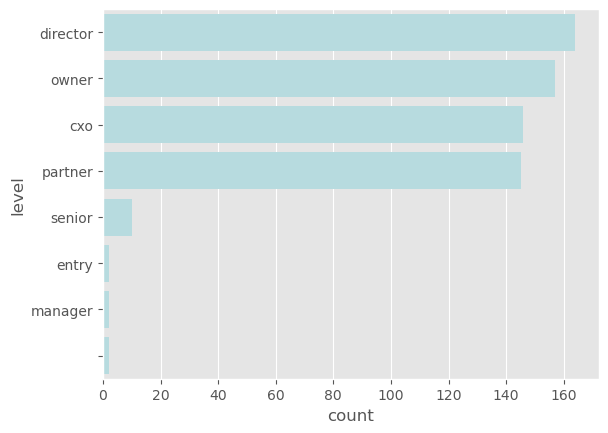

In [48]:
level_counts = df_main['level'].value_counts()
sorted_level = level_counts.index
sns.countplot(df_main, y='level', order=sorted_level, color='powderblue')

Some values are empty, but we didn't have any null values. Perhaps they are just blank spaces. 

In [49]:
display(df_main.sort_values(by='level', ascending = True))

,full_name,job_title,company_name,level,industry,location_country,location_locality,linkedin_username,mobile_phone,personal_email,work_email,experience
439,Lisa Graves,"Geologist, wellsite",Fuller and Sons,,,Zambia,Port Melissa,democrat-travel,+1-746-945-8181,iperez@gmail.com,edward84@montgomery-torres.com,[]
148,Matthew Franklin,Retail buyer,Martinez Group,,,Israel,Port Monica,development-free,956-441-9166x739,austinflores@yahoo.com,stephaniemays@johnson-yates.info,[]
0,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"[{'company': {'name': 'Reynolds-Matthews', 'we..."
133,Daniel Lopez,Founder and Investor,Gutierrez-Jones,cxo,computer software,Saudi Arabia,Port Loganfort,fund-sister,001-546-736-4514x530,lortiz@yahoo.com,lijoshua@cunningham.com,"[{'company': {'name': 'Gutierrez-Jones', 'webs..."
136,Lauren Jacobs,Investor and Operations Director and General M...,Russell-Fields,cxo,venture capital & private equity,United Kingdom,Lawrenceburgh,still-that-finally,296-547-1342x2909,ujohnston@hotmail.com,laurenhiggins@frazier-henderson.info,"[{'company': {'name': 'Russell-Fields', 'websi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
38,Jimmy Gonzalez,Vice President of Strategic Partnerships,"Liu, Kennedy and Serrano",senior,venture capital & private equity,Northern Mariana Islands,Bethberg,effort-social-mouth,+1-844-265-6455x721,scotttiffany@gmail.com,brownmelissa@yang.com,"[{'company': {'name': 'Liu, Kennedy and Serran..."
269,Matthew Calderon,Senior Recruiter,Smith-Benson,senior,transportation/trucking/railroad,Micronesia,Gravesfort,some-thus-be-new,001-866-578-3228x2139,khooper@gmail.com,kara34@green-green.net,"[{'company': {'name': 'Smith-Benson', 'website..."
228,Amy Bishop,Project Manager - Commercial Real Estate Devel...,Miles,senior,animation,Saint Helena,Smithville,laugh-same-them,+1-443-591-4343x6178,gbryant@yahoo.com,bethany01@cameron-campbell.com,"[{'company': {'name': 'Miles Ltd', 'website': ..."
274,Nicole Brown,Editor and and Healthcare Industry,"Bowen, Flores and Bowman",senior,computer software,South Africa,East Shelleyshire,pay-office-rate,+1-514-802-3669x1802,danielross@gmail.com,mccartyrobert@young.com,"[{'company': {'name': 'Bowen, Flores and Bowma..."


Yes, they are. However, what is more interesting, the most popular accounts here are directors, owners, cxo and partners. Let's compare with the whole set people_data.

<Axes: xlabel='count', ylabel='level'>

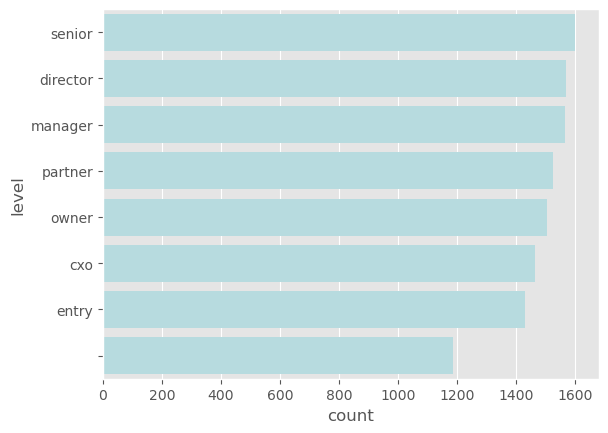

In [50]:
level_counts = df_main_2['level'].value_counts()
sorted_level = level_counts.index
sns.countplot(df_main_2, y='level', order=sorted_level, color='powderblue')

Interesting that director is no longer the most popular level in the database. Senior tends to be the most popular, however comparing with the previous diagram it's not that much considered in the loyal accounts database. Same goes for entry and manager. The first trait to notice is senority. 

##### Conclusions:
When choosing most loyable accounts, it's recommended to go for more senior roles such as cxo, director, owner and partner. 
Managers, seniors and entry level jobs are less likely to be prosperous accounts.

### Industry
Now let's see which industry is the most popular among our clients.

<Axes: xlabel='count', ylabel='industry'>

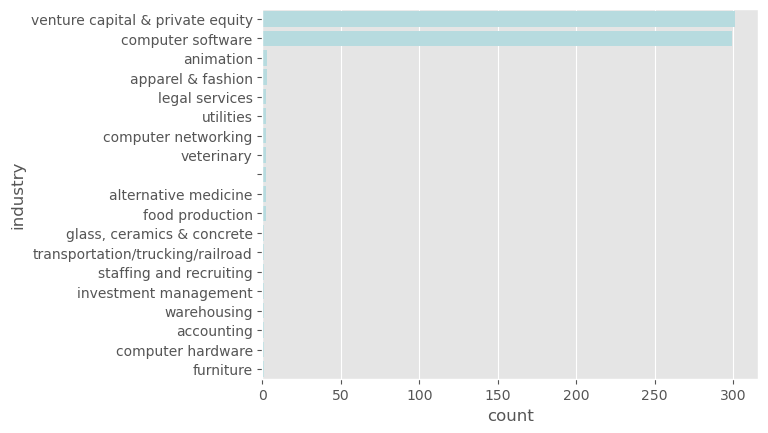

In [51]:
industry_counts = df_main['industry'].value_counts()
sorted_industries = industry_counts.index
sns.countplot(df_main, y='industry', order=sorted_industries, color='powderblue')

The most popular level industries are computer software and venture&private equity.
Again, let's compare them with general dataset.

<Axes: xlabel='count', ylabel='industry'>

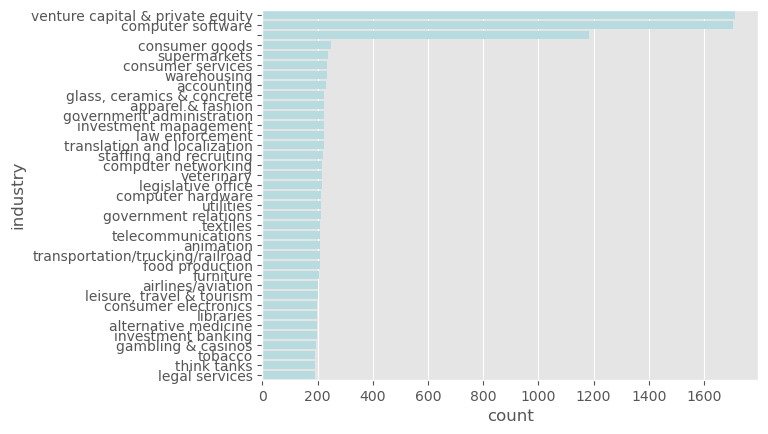

In [52]:
industry_counts = df_main_2['industry'].value_counts()
sorted_industries = industry_counts.index
sns.countplot(df_main_2, y='industry', order=sorted_industries, color='powderblue')

Both venture capital & private equity and computer software are the most popular industry category in selected and general dataset. Therefore it is not recommended to follow this trait. Let's see what are the following categories: animation and apparel&fashion. They are rather far in the general dataset, to they can be treated as characteristic trait for most loyable accounts.

##### Conclusions:
When choosing most loyable accounts, if they are not venture & private equity or computer software, it's recommended to go for following industries:
1) animation 
2) apparel&fashion

### Country
Now let's see in which country the clients from our most loyable account are located.

<Axes: xlabel='count', ylabel='location_country'>

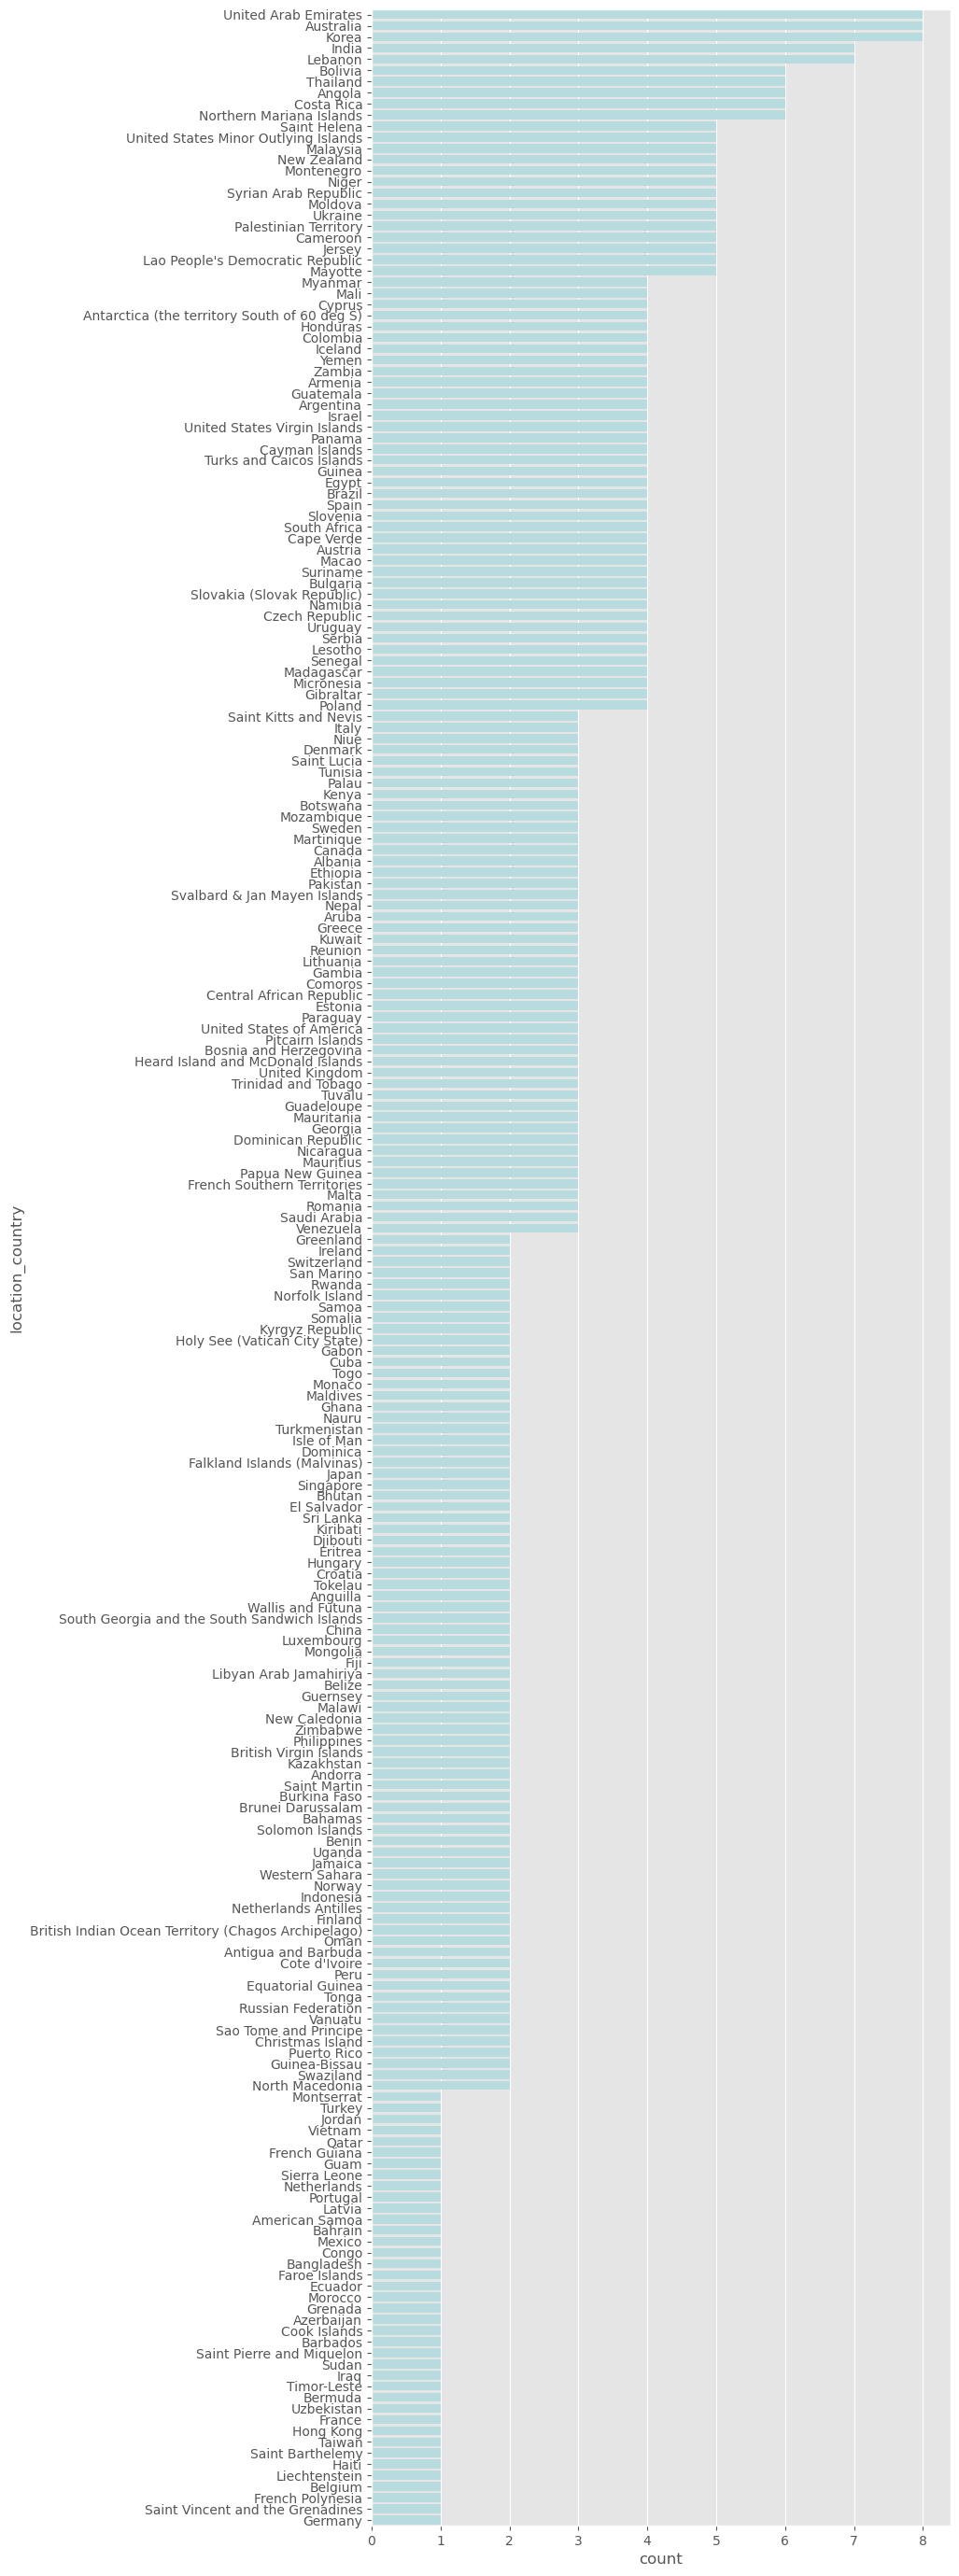

In [53]:
country_counts = df_main['location_country'].value_counts()
sorted_countries = country_counts.index
plt.figure(figsize=(8, 35))
sns.countplot(df_main, y='location_country', order=sorted_countries, color='powderblue')

Let's limit that to the top 10%.

<Axes: xlabel='count', ylabel='location_country'>

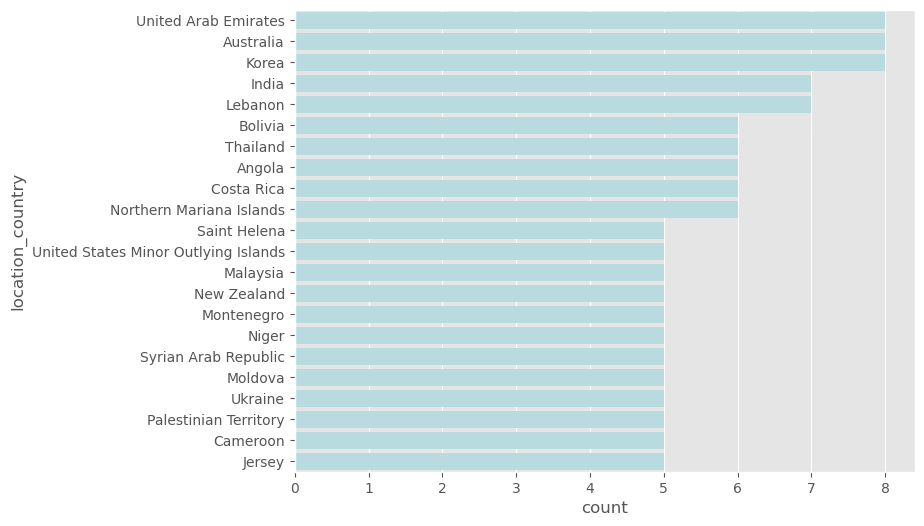

In [54]:
country_counts = df_main['location_country'].value_counts()
num_top_categories = int(len(country_counts) * 0.1)

top_categories = country_counts.nlargest(num_top_categories).index
df_top = df_main[df_main['location_country'].isin(top_categories)]

plt.figure(figsize=(8,6))
sns.countplot(df_top, y='location_country', order=top_categories, color='powderblue')

And again compare with general set.

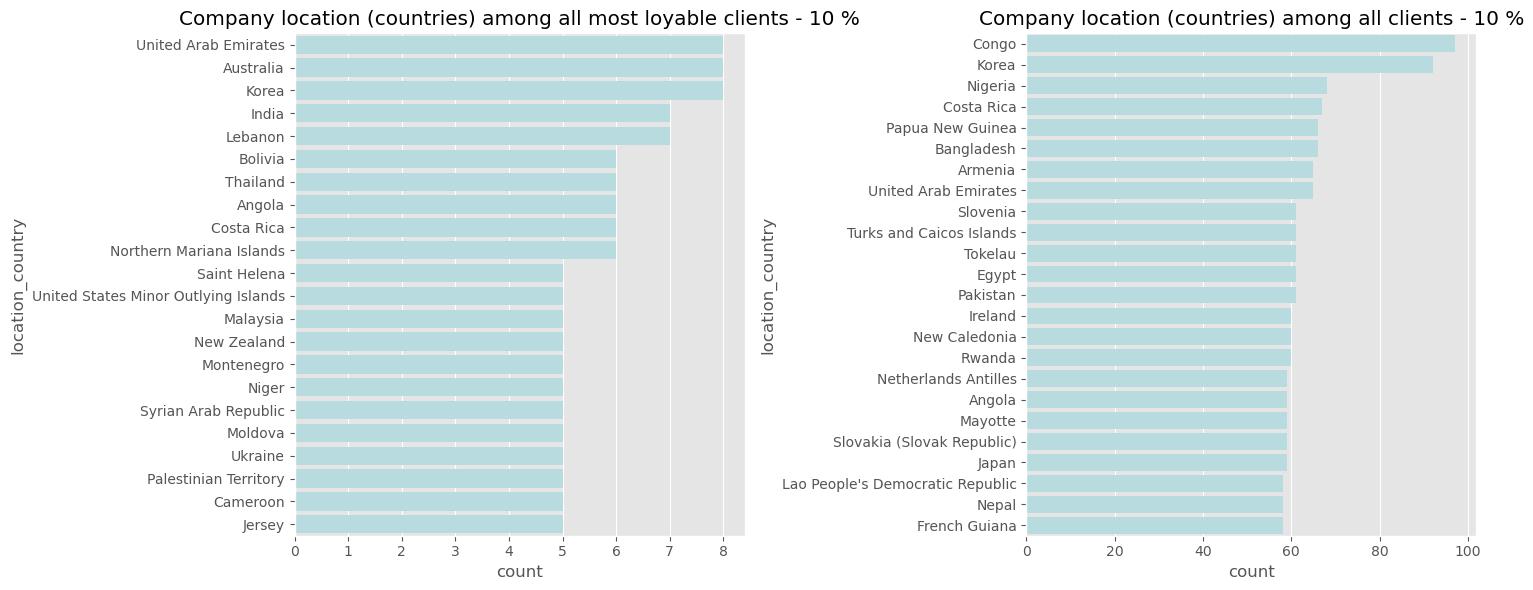

In [55]:
#First dataset
country_counts_1 = df_main['location_country'].value_counts()
num_top_categories_1 = int(len(country_counts_1) * 0.1)

top_categories_1 = country_counts_1.nlargest(num_top_categories_1).index
df_top_1 = df_main[df_main['location_country'].isin(top_categories_1)]

#Second dataset
country_counts_2 = df_main_2['location_country'].value_counts()
num_top_categories_2 = int(len(country_counts_2) * 0.1)

top_categories_2 = country_counts_2.nlargest(num_top_categories_2).index
df_top_2 = df_main_2[df_main_2['location_country'].isin(top_categories_2)]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(df_top_1, y='location_country', order=top_categories_1, ax=axs[0], color='powderblue')
axs[0].set_title('Company location (countries) among all most loyable clients - 10 %')

sns.countplot(df_top_2, y='location_country', order=top_categories_2, ax=axs[1], color='powderblue')
axs[1].set_title('Company location (countries) among all clients - 10 %')

plt.tight_layout()
plt.show()

Clearly, there are some distinction between countries that held most loyable accounts. When targeting the profile, selecting countries from the list on the left will increase chance for profits.

##### Comments:
In further stages it will be interesting to see, how it applies to more general factor, as the continent.
Looking at geographical aspects, information about the city, whether it is a smaller or bigger one could also bring some valuable insight. Or is it a capital or not.

##### Next recommended steps:
1) Group countries by continent and compare the results.
2) Classify cities by size (for example citizens number) and compare the results.
3) Classify cities (whether it's a capital or not) and compare the results.

### Size of the company
Now let's see how big are the companies of the most loyable accounts.

In [56]:
display(df_main_rev)

,full_name,job_title,company_name,level,industry,location_country,location_locality,linkedin_username,mobile_phone,personal_email,work_email,experience,comp_name,company_size
0,Gary Barber,Basketball Coach,Reynolds-Matthews,cxo,legal services,United States of America,Lake Danielleland,up-put-business-we,001-821-381-1130x44506,fritzteresa@hotmail.com,caitlinhawkins@torres-nelson.com,"[{'company': {'name': 'Reynolds-Matthews', 'we...",Reynolds-Matthews,201-500
1,Leslie Vega,Chief Executive Officer and Founder,Nelson-Mccall,director,computer software,Korea,Thomaschester,car-better-finally,+1-217-927-8498x4419,alfred13@gmail.com,wilsonbrandon@hogan.com,"[{'company': {'name': 'Nelson-Mccall', 'websit...",Nelson-Mccall,5001-10000
2,Kimberly Jenkins,"Senior Assistant Director, Community Engagement",Solomon,partner,venture capital & private equity,United Arab Emirates,West Anthony,perform-begin-money,734-280-0365x70617,pamela99@gmail.com,bharris@bates.com,"[{'company': {'name': 'Solomon Inc', 'website'...",Solomon,1001-5000
3,Michael Wilson,Founder and Executive Director,Hayes Group,partner,venture capital & private equity,Saudi Arabia,West Tim,technology,(532)804-3992,yorkangela@yahoo.com,cmyers@richards-chapman.org,"[{'company': {'name': 'Hayes Group', 'website'...",Hayes Group,1001-5000
4,David Craig,Chief Marketing Officer,"Wilson, Jarvis and Mueller",director,computer software,French Southern Territories,Wesleyshire,hotel-heart-under,207.581.5098,ucummings@yahoo.com,zbell@miles.net,"[{'company': {'name': 'Wilson, Jarvis and Muel...","Wilson, Jarvis and Mueller",5001-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Rebecca Blackburn,"Co-Founder, Business Development",Cooper-Wells,owner,venture capital & private equity,Svalbard & Jan Mayen Islands,East Richard,with-behind-foot,001-236-435-4004x33341,martinphillip@gmail.com,phelpswayne@hill.com,"[{'company': {'name': 'Cooper-Wells', 'website...",Cooper-Wells,51-200
624,Shawn Conner,Director of Events,"Blevins, Garcia and White",cxo,venture capital & private equity,Botswana,South John,again-deal-itself,+1-455-942-7809x38817,wwebster@yahoo.com,llee@pace.com,"[{'company': {'name': 'Blevins, Garcia and Whi...","Blevins, Garcia and White",201-500
625,Joseph Sullivan,Chief Executive Officer and Co-Founder,"Woodard, Hicks and Barber",cxo,computer software,Tunisia,Kimfort,green-allow-be-past,411.574.4824,rogersjoshua@gmail.com,mjohnson@clark.com,"[{'company': {'name': 'Woodard, Hicks and Barb...","Woodard, Hicks and Barber",1-10
626,Stephen Jones,Chief Executive Officer,"Taylor, Robbins and Stewart",partner,computer software,Slovakia (Slovak Republic),Moniqueburgh,staff-oil-use-so,205.605.5999,cynthiathomas@gmail.com,marynelson@woods.org,"[{'company': {'name': 'Taylor, Robbins and Ste...","Taylor, Robbins and Stewart",1001-5000


In [57]:
size_counts = df_main_rev.groupby('company_size')['comp_name'].nunique().reset_index()
size_counts.columns = ['Size','Companies (number)']
sorted_size_counts = size_counts.sort_values(by='Companies (number)', ascending=False)
display(sorted_size_counts)

,Size,Companies (number)
5,501-1000,105
6,51-200,87
1,1001-5000,86
3,201-500,86
2,11-50,85
0,1-10,82
4,5001-10000,75


Text(0, 0.5, 'Number of companies')

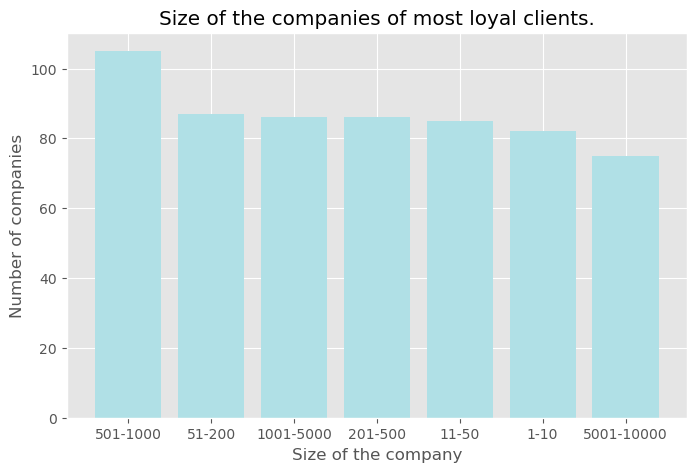

In [58]:
plt.figure(figsize=(8, 5))
plt.title('Size of the companies of most loyal clients.')
plt.bar(sorted_size_counts['Size'],sorted_size_counts['Companies (number)'], color='powderblue')
plt.xlabel('Size of the company')
plt.ylabel('Number of companies')

We can see that clearly companies of size between 501-1000 (and we can assume it's the information about the current employees number) are the one we need to target our offer.

## Insight generation.
Based on your analysis, generate insights and provide recommendations on how to target future sales efforts to acquire more loyal customers potentially.

In this report we have analyzed following features:
 1) Job level
 2) Industry
 3) Country
 4) Size of the company

Based on completed analysis, profile of most recommended client have features stated as below:
 1) Job level: director, owner, cxo, partner
 2) Industry: venture capital & private equity, computer software, animation, apparel&fashion
 3) Country: United Arab Emirates, Australia, India, Lebanon, Bolivia, Thailand, Angola, Costa Rica, Northern Mariana Islands
 4) Size of the company: 501-1000 / 51-200 / 1001-5000
 
Thank you!